In [371]:
import glob
import os
# path = input('''This is for X-ray data set. Please copy and paste path to your local data dir:
# blank will be set to current directory  ''')
# if path in (''):
#     path = os.getcwd()
# os.chdir(path)
std_list = glob.glob('./data/*.tif')
dark_list = []
for el in std_list:
    if 'dark' in el:
        dark_list.append(el)
        std_list.remove(el)
print('std_list = {}'.format(std_list))
print('dark_list = {}'.format(dark_list))

std_list = ['./data/AB1-269-CdSe_140mm_100K-00264.dark.tif', './data/AB1-269-CdSe_140mm_100K-00264.tif', './data/AB1-269-CdSe_140mm_100K-00268.tif', './data/AB1-275-CdOBz2_140mm_100K-00304.tif', './data/AB1-275-CdSe-bulk_140mm_100K-00307.tif', './data/AB1-275-CdSe_140mm_100K-00297.tif', './data/AB1-275-CdSe_140mm_100K-00299.tif', './data/Ba070K030Zn095Mn005As2_140mm_199K-00384.tif', './data/Ba070K030Zn095Mn005As2_140mm_239K-00380.tif', './data/Ba070K030Zn095Mn005As2_140mm_259K-00378.tif', './data/Ba070K030Zn095Mn005As2_140mm_279K-00377.tif', './data/BaFe2Se2O-B437_140mm_110K-00427.tif', './data/BaFe2Se2O-B437_140mm_122K-00434.tif', './data/BaFe2Se2O-B437_140mm_131K-00438.tif', './data/BaFe2Se2O-B437_140mm_132K-00439.tif', './data/BaFe2Se2O-B437_140mm_139K-00442.tif', './data/BaFe2Se2O-B437_140mm_161K-00453.tif', './data/BaFe2Se2O-B437_140mm_167K-00456.tif', './data/BaFe2Se2O-B437_140mm_201K-00474.dark.tif', './data/BaFe2Se2O-B437_140mm_205K-00475.tif', './data/BaFe2Se2O-B437_140mm_211K

In [372]:
import tifffile as tif
import numpy as np
import math
import pandas as pd

from skimage import data, io, transform
from skimage.util import img_as_float
from skimage.filters import gabor_kernel

%matplotlib inline

classes = {"experiment":0, "black":1, "white":2,"random":3}
num_dummies = 50

def read_in_array(f_list):
    first_ob= tif.imread(f_list[0])
    obs_len = len(f_list)
    print(obs_len)
    obs_dim = np.shape(first_ob)
    #print(obs_dim)
    pixel_len = obs_dim[0]*obs_dim[1]
    print(pixel_len)
    img_array = []
    for el in f_list:
        img_read = tif.imread(el)
        np.reshape(img_read,(1, pixel_len))
        img_array.append(img_read)
    out= np.reshape(img_array, (obs_len, pixel_len))
    print('dim of img_array = {}'.format(np.shape(out)))
    return out

In [103]:
img_array = read_in_array(std_list)

117
4194304
dim of img_array = (117, 4194304)


In [373]:
len(img_array)

117

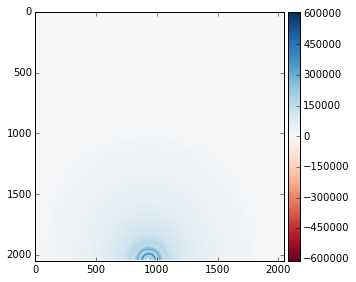

In [374]:
training_images = []
training_labels = []
for img in img_array:
    reshaped = np.reshape(img,(2048,2048))
    training_images.append(reshaped)
    training_labels.append(1)
io.imshow(training_images[2])

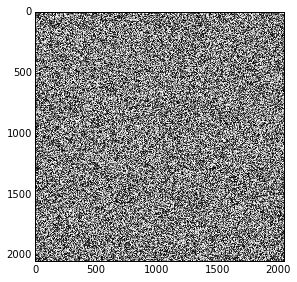

In [375]:
rand_images = np.random.rand(num_dummies, 2048, 2048)
rand_labels = []

for i in range(0,num_rand):
    rand_labels.append(classes['random'])
io.imshow(rand_img[2])

100

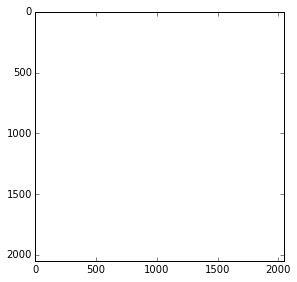

In [376]:
white_black_images = []
white_black_labels = []
num_zero = 1
for i in range(0,num_dummies):
    black_image = np.zeros((2048,2048))
    white_black_images.append(black_image)
    white_black_labels.append(classes['black'])
    white_image = np.ones((2048,2048))
    white_black_images.append(white_image)
    white_black_labels.append(classes['white'])
io.imshow(white_black_images[1])
len(white_black_images)

# Load some real data

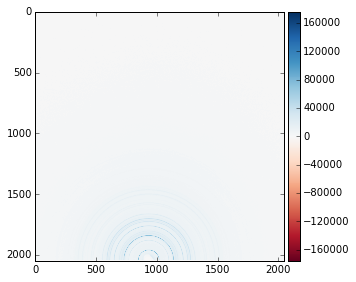

In [385]:
filename = "./data/K08Fe2-xNixSe2-x100-B817_400mm_300K-00129.tif"
arr = np.array([[4,4,1],[0,-1,-2],[1,4,4]])
image = io.imread(filename,as_grey=True)
io.imshow(image)

In [386]:
def log_resize(arr, threshold=1e-5, size=None):
    import skimage.transform
    arr[arr <= 0] = threshold
    arr = np.log(arr)
    if size != len(arr):
        arr = resize(image_log.astype(float), (size,size))
    return arr

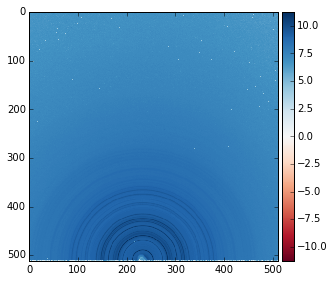

In [387]:
image_log = log_resize(image,size=512)
io.imshow(image_log)

In [388]:
image_log

array([[-0.84830731, -0.43219614,  1.49985814, ...,  2.01792645,
        -4.60517025, -1.1320523 ],
       [ 2.33163053, -0.42050219,  5.21247363, ...,  4.67205313,
         0.10096598, -2.46606678],
       [ 0.81490842,  0.12585962,  6.35911775, ...,  5.45744491,
        -0.07112181, -4.60517025],
       ..., 
       [ 1.67492437,  2.06032038,  7.72159851, ...,  7.28467691,
         4.81814575, -2.69274706],
       [ 1.54831541,  0.68270385,  1.51551974, ...,  3.69923973,
         1.89266241, -2.61205375],
       [-2.63935357, -0.46932936, -0.2338047 , ...,  2.40582871,
        -2.49671733, -0.81104845]])